# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})
~~~~

In [2]:
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})

Draw a dispersion diagram (scatter plot) for the data.

<Axes: xlabel='Age', ylabel='Tardies'>

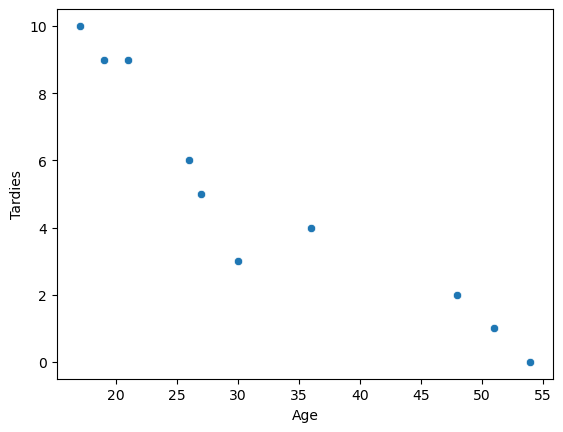

In [4]:
sns.scatterplot(x=student_data["Age"], y=student_data["Tardies"])

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

There appears to be a negative trend between age and the number of tardies: the plotted observations of tardies get generally fewer as the age increases.

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [7]:
df_corr = student_data["Age"].corr(student_data["Tardies"])
print(df_corr)

df_cov = student_data["Age"].cov(student_data["Tardies"])
print(df_cov)

-0.9391626886887122
-45.56666666666666


According to the correlation coefficient, age and the number of tardies have a strong negative correlation.</br>
The covariance value also tells us that they have a negative relationship where one increases as the other tends to decrease.

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [10]:
# Based on the graph before, the correlation appears linear, so I'll use a linear regression model to predict the target variable of Tardies (outcome) from the Age input

from sklearn.model_selection import train_test_split

# reshape the feature to be a 2D array
X = student_data["Age"].to_numpy().reshape(-1,1)
y = student_data["Tardies"].values

# split the data to training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=2, random_state=42)

# create a linear regression and fit the model
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [11]:
print(lm.intercept_, lm.coef_)

13.464088397790054 [-0.26657459]


Plot your regression model on your scatter plot.

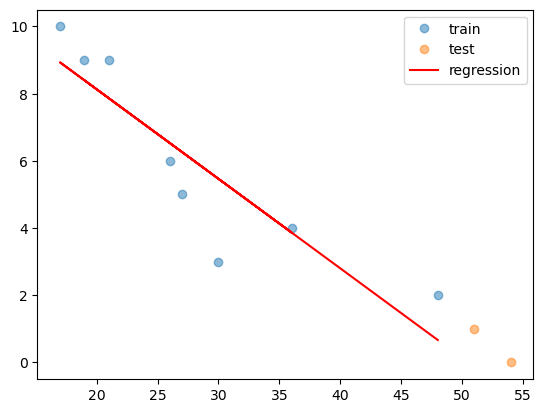

In [16]:
y_train_pred = lm.predict(X_train)

plt.plot(X_train, y_train, "o", alpha=0.5, label="train") 
plt.plot(X_test, y_test, "o", alpha=0.5, label="test")
plt.plot(X_train, y_train_pred,'r', label="regression"); 
plt.legend()
plt.show()

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [15]:
from sklearn.metrics import mean_squared_error, r2_score

y_train_pred = lm.predict(X_train)
y_test_pred = lm.predict(X_test)

print("R^2 Scores:")
print(r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred))

print("Mean Squared Error:")
print(mean_squared_error(y_train_pred, y_train), mean_squared_error(y_test_pred, y_test))

R^2 Scores:
0.8038889848066298 -3.2925925643295377
Mean Squared Error:
1.5688881215469612 1.0731481410823844


Based on the graph displaying the regression prediction, it appears to fit the obseerved data quite well.

The R^2 score for the training data is 0.80, which suggests the fit is quite reliable. The score for the test data however is at -3.29, which suggests that these points of observation did not fit the prediction at all. For such a small data set, and since the test samples ended up being outliers, it is not particularly surprising that they do not fit the regression as expected.

The mean squared error values are very small, which lends credibility to the model.

Based on the data we have and the model it allowed us to build, we can say that age is infact a good predictor of tardiness.

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [18]:
# Import any libraries you may need & the data
vehicles = pd.read_csv("../vehicles.csv")

Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [23]:
X = vehicles[["Year", "Cylinders", "Fuel Barrels/Year", "Combined MPG", "Fuel Cost/Year"]]
y = vehicles["CO2 Emission Grams/Mile"]

X.corrwith(y)

Year                -0.222300
Cylinders            0.752393
Fuel Barrels/Year    0.986189
Combined MPG        -0.926229
Fuel Cost/Year       0.930865
dtype: float64

The feature with the strongest correlation to CO2 emissions is Fuel Barrels/Year with a correlation coefficient of 0.986, closely followed by Fuel Cost/Year (0.93) and Combined MPG (-0.926).

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [24]:
# I'll build a multilinear regression model to account for more features that impact the target.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lm = LinearRegression()

lm.fit(X_train, y_train)

print(lm.intercept_, lm.coef_)

755.6935073143893 [-0.31558675  1.79402632 19.23102729 -2.9335732   0.03197145]


Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [28]:
y_train_pred = lm.predict(X_train)
y_test_pred = lm.predict(X_test)

print(r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred))

print(mean_squared_error(y_train_pred, y_train), mean_squared_error(y_test_pred, y_test))

0.9812190180453002 0.9794542628636335
266.54309246433513 289.82774408137686


The highest impact on the CO2 emissions comes from the fuel barrels used per year, as it has the largest absolute coefficient.

The R^2 values for both the training and test data are approaching 1, both around 0.98, which lends credibility to the model.

The mean squared errors are however high, suggesting that there may be many outliers in the data despite the model fitting quite well.

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [ ]:
# Your code here.

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

In [ ]:
# Your code here.

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

*your explanation here*

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [2]:
# Your response here.

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

*your explanation here*